# Tori Lowery's Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None, "display.max_rows", None)

# Read in csv
houses = pd.read_csv("../data/train.csv", index_col = "Id")

# Adjust MSSubClass to string
houses["MSSubClass"] = houses["MSSubClass"].astype('str')

# Convert Alley to Factor
houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

# Impute missing GarageYrBlt from year house built
houses.loc[pd.isna(houses.GarageYrBlt), "GarageYrBlt"] = houses.loc[pd.isna(houses.GarageYrBlt), "YearBuilt"]

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

# Convert Exterior Quality and Condition to Scale
houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)

# Convert Basement Quality and Condition to Scale
houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

# Convert Heating, Kitchen, and Garage Quality and Finish to Scale
houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)

# Feature Engineer total Porch/Deck Area
houses["TotalPorchSqft"] = houses["WoodDeckSF"] + houses["OpenPorchSF"] + houses["EnclosedPorch"] + houses["3SsnPorch"] + houses["ScreenPorch"]

# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

# Drop Columns
houses = houses.drop(["MiscFeature", "Fence", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                      "PoolArea", "PoolQC", "GarageCond", 
                      "GarageCars", "BsmtFinSF1", "BsmtFinSF2"], axis=1)

# houses.dtypes
# dict(houses.isna().sum())
houses.head(10)
# houses.shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSqft
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,0,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,1,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,5,Attchd,2003.0,2,548,3,Y,0,2,2008,WD,Normal,208500,61
2,20,RL,80.000000,9600,Pave,0,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,1,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,460,3,Y,0,5,2007,WD,Normal,181500,298
3,60,RL,68.000000,11250,Pave,0,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,1,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,608,3,Y,0,9,2008,WD,Normal,223500,42
4,70,RL,60.000000,9550,Pave,0,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,1,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,642,3,Y,0,2,2006,WD,Abnorml,140000,307
5,60,RL,84.000000,14260,Pave,0,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,1,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,836,3,Y,0,12,2008,WD,Normal,250000,276
6,50,RL,85.000000,14115,Pave,0,IR1,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Wood,4,3,1,6,1,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,5,Attchd,1993.0,1,480,3,Y,700,10,2009,WD,Normal,143000,390
7,20,RL,75.000000,10084,Pave,0,Reg,Lvl,AllPub,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,2,PConc,5,3,3,6,1,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4,Attchd,2004.0,2,636,3,Y,0,8,2007,WD,Normal,307000,312
8,60,RL,84.039801,10382,Pave,0,IR1,Lvl,AllPub,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,2,CBlock,4,3,2,5,4,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3,Attchd,1973.0,2,484,3,Y,350,11,2009,WD,Normal,200000,667
9,50,RM,51.000000,6120,Pave,0,Reg,Lvl,AllPub,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,2,BrkTil,3,3,1,1,1,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3,Detchd,1931.0,1,468,2,Y,0,4,2008,WD,Abnorml,129900,295


In [ ]:
# plt.hist(houses.SalePrice)

# Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
X = pd.get_dummies(houses.drop(["SalePrice"], axis=1), drop_first=True, dummy_na=True)
y = houses['SalePrice']
y_log = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
gbm.set_params(verbose=0, random_state=42)
gbm.fit(X_train, y_train)
print("The train score is: ", gbm.score(X_train, y_train))
print("The test score is: ", gbm.score(X_test, y_test))

The train score is:  0.9686345902141202
The test score is:  0.9208957260932473


In [40]:
gbm.set_params(learning_rate=0.1, n_estimators=500, verbose=0, loss='ls', 
               max_depth=3, max_features=None, min_impurity_decrease=0.00, random_state=42)
gbm.fit(X_train, y_train)
print("The new train score is: ", gbm.score(X_train, y_train))
print("The new test score is: ", gbm.score(X_test, y_test))

The new train score is:  0.9943251984857514
The new test score is:  0.9232141798748441


In [ ]:
grid_para_gbm = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [.0001, .001, .01, 0.1],
    "min_samples_leaf": range(1, 20, 2),
    "max_features": [None, 1, 2, 3],
    "random_state": [42]}
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring='r2', cv=5, n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)
print("The best train score is: ", grid_search_gbm.best_estimator_.score(X_train, y_train))
print("The best test score is: ", grid_search_gbm.best_estimator_.score(X_test, y_test))

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lencoder = LabelEncoder()
# houses_gb = houses.copy()
# for i, item in enumerate(houses_gb.dtypes):
#     if item == "object":
#         houses_gb.iloc[i] = lencoder.fit_transform(houses_gb.iloc[i]).reshape((-1,1))

# Random Forest

In [2]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [3]:
randomForest.set_params(random_state=42, n_estimators=500, max_features=100, max_depth=10)

# Use selected columns
use_columns = ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", 
              "BldgType", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond",
              "BsmtExposure", "TotalBsmtSF", "Heating", "HeatingQC", "CentralAir", "1stFlrSF", "2ndFlrSF",
               "Fireplaces", "KitchenAbvGr", "KitchenQual", "FireplaceQu", "GarageType", "GarageArea", "GarageQual", 
              "SaleType", "SaleCondition", "TotalPorchSqft"]
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train) 
print("The train score using selected columns is: ", randomForest.score(X_train, y_train)) 
print("The test score using selected columns is: ", randomForest.score(X_test, y_test), "\n") 

# Selected columns with log house price
y2 = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using selected columns and log sale price is: ", randomForest.score(X_train, y_train)) 
print("The test score using selected columns and log sale price is: ", randomForest.score(X_test, y_test), "\n") 

# use all columns
X = pd.get_dummies(houses.drop(["SalePrice"], axis=1), drop_first=True, dummy_na=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using all columns is: ", randomForest.score(X_train, y_train)) 
print("The test score using all columns is: ", randomForest.score(X_test, y_test), "\n") 

# All columns and with log price
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using all columns and log sale price is: ", randomForest.score(X_train, y_train)) 
print("The test score using all columns and log sale price is: ", randomForest.score(X_test, y_test)) 

The train score using selected columns is:  0.9701579784897983
The test score using selected columns is:  0.9009638428032133 

The train score using selected columns and log sale price is:  0.9705828627376659
The test score using selected columns and log sale price is:  0.8680869061979787 

The train score using all columns is:  0.9748296322810135
The test score using all columns is:  0.9183067494329159 

The train score using all columns and log sale price is:  0.9753249539422261
The test score using all columns and log sale price is:  0.8898688928564761


In [ ]:
# randomForest.oob_score_ 

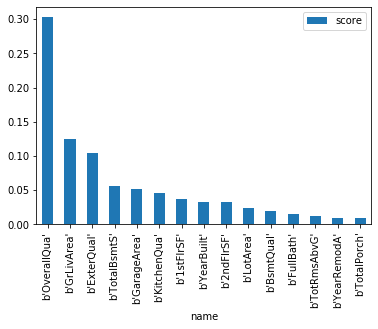

In [4]:
# Using the best combination found above:
X = pd.get_dummies(houses.drop(["SalePrice"], axis=1), drop_first=True, dummy_na=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)

feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

## RF Grid Search

In [9]:
grid_para_forest = {
    "n_estimators": [300, 500, 800],
    "max_depth": list(range(9, 22, 2)),
    "random_state": [42]}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features=100,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,


In [10]:
print("The best params found were:", grid_search_forest.best_params_)
print("The best score found was:", grid_search_forest.best_score_)
print("The train score with the best estimator is:", grid_search_forest.score(X_train, y_train))
print("The test score with the best estimator is:", grid_search_forest.score(X_test, y_test))

The best params found were: {'max_depth': 19, 'n_estimators': 800, 'random_state': 42}
The best score found was: 0.8267021866440002
The train score with the best estimator is: 0.979546757977026
The test score with the best estimator is: 0.9180379376859372


## Examine Effects of Different Number of Trees

In [ ]:
n_trees_range = range(10, 500, 100)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
#     for n_feat in n_feat_range:
    randomForest.set_params(n_estimators=n_trees, max_features = 26, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

# Variance Test

In [12]:
import sklearn.feature_selection as fs
import pprint

# Find Variances of all columns
variances = dict(zip(houses.columns, np.var(houses, 0)))
# print('Variation:')
# pprint.pprint(variances)

# Filter out unwanted columns with variance below 1
variances_filtered = []
for k, v in variances.items():
    if v > 1:
        variances_filtered.append(k)
unwanted_columns = list(variances.keys() - variances_filtered)
unwanted_columns.append("SalePrice")

In [13]:
X = pd.get_dummies(houses.drop(unwanted_columns, axis=1), drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

randomForest.set_params(random_state=42, n_estimators=500, max_features=100, max_depth=10)
randomForest.fit(X_train, y_train)
print("The train score with low variance columns dropped is: ", randomForest.score(X_train, y_train)) 
print("The test score with low variance columns dropped is: ", randomForest.score(X_test, y_test)) 

The train score with low variance columns dropped is:  0.973534182785868
The test score with low variance columns dropped is:  0.9124534783675884


# Multiple Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
ols = linear_model.LinearRegression()

In [ ]:
# Log improves MLR performance
# Drop columns found to have little variance
X2 = pd.get_dummies(houses.drop(unwanted_columns, axis=1), drop_first=True, dummy_na=True)
y2 = np.log(houses['SalePrice'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
ols.fit(X2_train, y2_train) # fit 
ols.score(X2_train, y2_train) # accuracy 

In [ ]:
ols.score(X2_test, y2_test)

## Regularization

### A. Ridge Exploration

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
X = pd.get_dummies(houses.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'slope values')

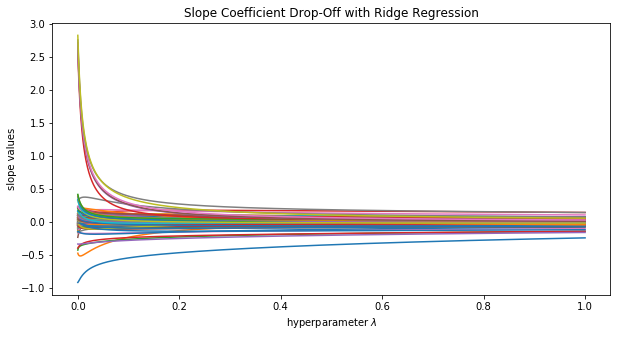

In [27]:
# Test different alphas
alphas = np.linspace(.00001, 1, 1000)
ridge.set_params(normalize=True)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
        test_scores.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  

# Plot the effects of increasing lambdas
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

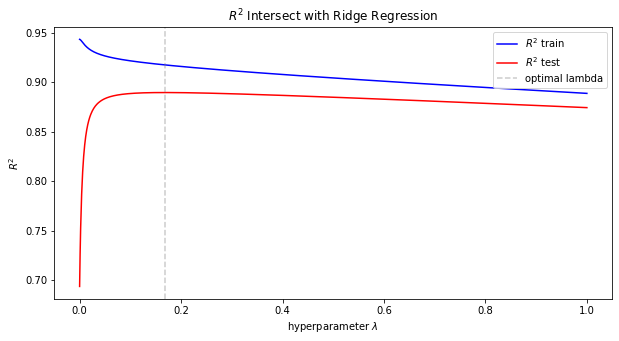

In [36]:
# Plot the R^2 scores for train and test
plt.plot(alphas, scores, c='b', label=r'$R^2$ train')
plt.plot(alphas, test_scores, c='r', label=r'$R^2$ test')
highest_test_score = alphas[np.array(test_scores) == max(test_scores)]
plt.axvline(highest_test_score, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersect with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [37]:
ridge.set_params(normalize=True, alpha=last_underfit)
ridge.fit(X_train, y_train)
print("The train score with low variance columns dropped is: ", ridge.score(X_train, y_train))
print("The test score with low variance columns dropped is: ", ridge.score(X_test, y_test))

The train score with low variance columns dropped is:  0.9198263000223814
The test score with low variance columns dropped is:  0.8891917544622527


### B. Lasso Exploration

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
X = pd.get_dummies(houses.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different lambdas
alphas = np.linspace(0.1,40.1,100)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores_lasso = []
scores_test_lasso = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X2_train, y2_train)  
        coefs_lasso.append(lasso.coef_)
        scores_lasso.append(lasso.score(X2_train, y2_train))
        scores_test_lasso.append(lasso.score(X2_test, y2_test))
coefs = pd.DataFrame(coefs_lasso, index = alphas, columns = X2_train.columns)  
coefs.head()

In [ ]:
alphas = np.linspace(0.1,40.1,100)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores_lasso = []
scores_test_lasso = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X2_train, y2_train)  
        coefs_lasso.append(lasso.coef_)
        scores_lasso.append(lasso.score(X2_train, y2_train))
        scores_test_lasso.append(lasso.score(X2_test, y2_test))
coefs = pd.DataFrame(coefs_lasso, index = alphas, columns = X2_train.columns)  
coefs.head()

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [ ]:
# coefs.iloc[20, (coefs.iloc[20, ] > 0).values]

In [ ]:
plt.plot(alphas, scores_lasso, c='b', label=r'$R^2$ train')
plt.plot(alphas, scores_test_lasso, c='r', label=r'$R^2$ test')
lasso_overfit = alphas[np.array(scores_test_lasso) < np.array(scores_lasso)]
last_overfit = max(lasso_overfit)
plt.axvline(last_overfit, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersection with Lasso Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [ ]:
lasso.set_params(normalize=True, alpha=last_overfit)
lasso.fit(X2_train, y2_train)
lasso.score(X2_train, y2_train)

In [ ]:
lasso.score(X2_test, y2_test)

## Observe P values and conf intervals for Features

In [ ]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X2_train)
ols3 = sm.OLS(y2_train, X_add_const)
ans = ols3.fit()
# print(ans.summary())
ans.summary().tables[1]

## Comparing R^2 to All other Features

In [ ]:
cont_features = ['LotFrontage', 'LotArea', "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", 'MasVnrArea', 
                "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                "BsmtUnfSF", "HeatingQC", 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', "BsmtFullBath", 
                'GrLivArea', "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", 
                "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", 'GarageArea', "GarageFinish", "GarageArea", "GarageQual",
                "MiscVal", "MoSold", "YrSold", 'TotalPorchSqft']
scores = {}
ols2 = linear_model.LinearRegression()
for feature_name in cont_features:
    df2 = houses.copy().drop("GarageYrBlt", axis=1)
    df2 = pd.get_dummies(df2, drop_first=True, dummy_na=True)
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature) 

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index().sort_values(["R2"]))
plt.title('$R^2$ of a continuous feature against the other features')
for item in ax.get_xticklabels(): item.set_rotation(90)

# Visualization of Data

### 1. 1st and 2nd Floor  and Basement SQFT against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='1stFlrSF', y='SalePrice',c='b', alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='2ndFlrSF', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='g', alpha=.2)
plt.show()

### 2. Lot Frontage, Year Built, and Year Remodelled against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='LotFrontage', y='SalePrice',c='b',  alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='YearBuilt', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='YearRemodAdd', y='SalePrice',c='g', alpha=.2)
plt.show()

### 3. Overall Quality against Price

In [ ]:
import seaborn as sns
g = sns.FacetGrid(data=houses, col="OverallQual", hue="OverallQual", palette="tab20c",
                     col_wrap=5, height=3)
g.map(plt.hist, "SalePrice")

In [ ]:
sns.violinplot(x="OverallQual", y="SalePrice", data=houses)

In [ ]:
sns.lmplot(y="SalePrice", x="OverallQual", hue="OverallQual",
               height=7, data=houses)

### 4. MS Zoning against Price

In [ ]:
sns.violinplot(x="MSZoning", y="SalePrice", data=houses, palette="Set3", scale="count", order=["C (all)", "RM", "RH", "RL", "FV"])

### 5. Total Porch and Deck SQFT (feature eng.) against Price

In [ ]:
houses.plot(kind='scatter', x='TotalPorchSqft', y='SalePrice',c='maroon', alpha=.2)
plt.show()

### 6. Year Built grouped by Exterior Quality against Price

In [ ]:
sns.lmplot(x="YearBuilt", y="SalePrice", hue="ExterQual",
               height=10, data=houses)

### 7. Overall Condition against Price

In [ ]:
sns.violinplot(x="OverallCond", y="SalePrice", data=houses, palette="Set3", scale= "count")

### 8. Above Ground Living Area SQFT grouped by Overall Quality against Price

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="OverallQual",
               height=5, data=houses.loc[houses["OverallQual"] > 5])

In [ ]:
# sns.lmplot(x="YearBuilt", y="SalePrice", hue="OverallCond",
#                height=5, data=houses.loc[houses["OverallCond"] == 5])

In [ ]:
# houses[(houses['CentralAir'] == "N")][["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")
# houses[(houses['Alley'] == "Grvl")].plot.bar()#[["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")

In [ ]:
# houses['CentralAir'].hist()

In [ ]:
# houses.groupby(["BsmtFinType1", "MSSubClass"])[["MSSubClass"]].count().plot.bar(figsize = (15, 5))

In [ ]:
# houses[(houses["PoolArea"] != 0)]["SalePrice"]

In [ ]:
# houses["SalePrice"].mean()

In [ ]:
# gargqual = houses.replace(np.nan, "NA").groupby(["GarageQual"])["GarageQual"].count()
# gargfin = houses.replace(np.nan, "NA").groupby(["GarageFinish"])["GarageFinish"].count()
# plt.bar(x=gargqual.index, height=gargqual.values)

In [ ]:
# houses.groupby("MasVnrType")[["MasVnrType"]].count().plot.bar()
# houses["AvgMasArea"] = houses.cut("MasVnrArea", 20)
# houses[["MasVnrArea", "SalePrice"]].plot.scatter(x="MasVnrArea" , y="SalePrice" )

In [ ]:
# houses["YearBuilt"].sort_values(ascending=False)